<a href="https://colab.research.google.com/github/dhanirr523/EnergyDS_Spain_Production_Weather/blob/main/Spain_Energy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Important libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Investigate energy dataset

In [3]:
energy_path = "energy_dataset.csv\energy_dataset.csv"

# Load the dataset
energy_data = pd.read_csv(energy_path)

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\ramad\AppData\Local\Temp\ipykernel_24368\4035865047.py:1: SyntaxWarning: invalid escape sequence '\e'
  energy_path = "energy_dataset.csv\energy_dataset.csv"


In [4]:
#set 'time' column as index and datatype to datetime
energy_data['time'] = pd.to_datetime(energy_data['time'])
energy_data.set_index('time', inplace=True)
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped storage a

C:\Users\ramad\AppData\Local\Temp\ipykernel_24368\1710371874.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  energy_data['time'] = pd.to_datetime(energy_data['time'])


In [5]:
# Check for missing values
missing_values = energy_data.isnull().sum().sort_values(ascending=False)
missing_values

generation hydro pumped storage aggregated     35064
forecast wind offshore eday ahead              35064
total load actual                                 36
generation biomass                                19
generation hydro run-of-river and poundage        19
generation marine                                 19
generation fossil oil                             19
generation hydro pumped storage consumption       19
generation waste                                  19
generation fossil gas                             18
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation geothermal                             18
generation fossil hard coal                       18
generation fossil oil shale                       18
generation fossil peat                            18
generation solar                                  18
generation other renewable                        18
generation other                              

In [6]:
columns = energy_data.columns.tolist()
columns

['generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage aggregated',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind offshore eday ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'price actual']

In [7]:
# Check for duplicate rows
duplicates = energy_data.duplicated().sum()
duplicates

np.int64(0)

In [8]:
#drop generation hydro pumped storage aggregated forecast wind offshore eday ahead
energy_data.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], inplace=True)

In [9]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped storage c

In [10]:
#rows with missing values
missing_rows = energy_data[energy_data.isnull().any(axis=1)]
missing_rows

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-05 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,546.0,8233.0,21912.0,21182.0,35.20,59.68
2015-01-05 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3932.0,9258.0,23209.0,NaN,35.50,79.14
2015-01-05 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4236.0,9156.0,23725.0,NaN,36.80,73.95
2015-01-05 14:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4215.0,9072.0,23614.0,NaN,32.50,71.93
2015-01-05 15:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4050.0,8779.0,22381.0,NaN,30.00,71.50
2015-01-05 16:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3728.0,8426.0,21371.0,NaN,30.00,71.85
2015-01-05 17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3175.0,7946.0,20760.0,NaN,30.60,80.53
2015-01-19 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,91.0,6434.0,38642.0,39304.0,70.01,88.95
2015-01-19 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28.0,6907.0,38758.0,39262.0,69.00,87.94


In [11]:
# Select only numeric columns for rolling window operation
numeric_columns = energy_data.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values for numeric columns using a rolling window average
window_size = 7  # Adjust the window size as needed
for column in numeric_columns:
    energy_data[column] = energy_data[column].fillna(
        energy_data[column].rolling(window=window_size, min_periods=1, center=True).mean()
    )

# Check the result
energy_data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [12]:
energy_data.isnull().sum().sort_values(ascending=False)

total load actual                              2
generation biomass                             0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation fossil brown coal/lignite           0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation marine                              0
generation hydro water reservoir               0
generation other                               0
generation other renewable                     0
generation solar                               0
generation nuclear                             0
generation waste                               0
generation wind offshore                       0
forecast solar day a

In [15]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil coal-derived gas           35064 non-null  float64
 3   generation fossil gas                        35064 non-null  float64
 4   generation fossil hard coal                  35064 non-null  float64
 5   generation fossil oil                        35064 non-null  float64
 6   generation fossil oil shale                  35064 non-null  float64
 7   generation fossil peat                       35064 non-null  float64
 8   generation geothermal                        35064 non-null  float64
 9   generation hydro pumped storage c

Text(0.5, 0, 'Time')

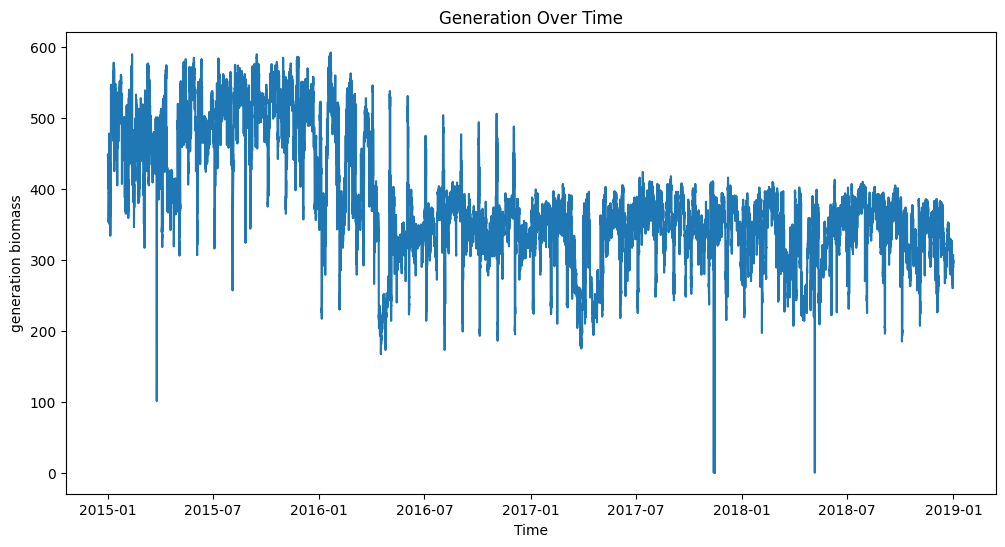

In [16]:
#energy_data.set_index('time', inplace=True)

# plot generation over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=energy_data, x=energy_data.index, y='generation biomass')
plt.title('Generation Over Time')
plt.xlabel('Time')

In [21]:
# Ensure the index is a DatetimeIndex
energy_data.index = pd.to_datetime(energy_data.index, utc=True)

# Show unique years in the dataset
unique_years = energy_data.index.year.unique()
print("Unique years in the dataset:", unique_years)

Unique years in the dataset: Index([2014, 2015, 2016, 2017, 2018], dtype='int32', name='time')


In [22]:
df_generation = energy_data.copy()
df_generation

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,1.0,...,85.0,277.0,0.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
2018-12-31 19:00:00+00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,1.0,...,33.0,280.0,0.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
2018-12-31 20:00:00+00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,50.0,...,31.0,286.0,0.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30


## Investigate Weather Data 

In [27]:
weather_data = pd.read_csv("weather_features.csv\weather_features.csv", index_col='dt_iso')

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ramad\AppData\Local\Temp\ipykernel_24368\3151828687.py:1: SyntaxWarning: invalid escape sequence '\w'
  weather_data = pd.read_csv("weather_features.csv\weather_features.csv", index_col='dt_iso')


In [29]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178396 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_name            178396 non-null  object 
 1   temp                 178396 non-null  float64
 2   temp_min             178396 non-null  float64
 3   temp_max             178396 non-null  float64
 4   pressure             178396 non-null  int64  
 5   humidity             178396 non-null  int64  
 6   wind_speed           178396 non-null  int64  
 7   wind_deg             178396 non-null  int64  
 8   rain_1h              178396 non-null  float64
 9   rain_3h              178396 non-null  float64
 10  snow_3h              178396 non-null  float64
 11  clouds_all           178396 non-null  int64  
 12  weather_id           178396 non-null  int64  
 13  weather_main         178396 non-null  object 
 14  weather_description  178396 no

looks like the weather feature is clean

In [33]:
# Ensure the index is a DatetimeIndex
weather_data.index = pd.to_datetime(weather_data.index, utc=True)

# Unique years in the dataset
unique_years_weather = weather_data.index.year.unique()
print("Unique years in the weather dataset:", unique_years_weather)

df_weather = weather_data.copy()

Unique years in the weather dataset: Index([2014, 2015, 2016, 2017, 2018], dtype='int32', name='dt_iso')


# Working on 2018 Wind Data

In [40]:
# subset df gen for year 2018 onshore wind generation
ow_generation_2018 = df_generation[df_generation.index.year == 2018]['generation wind onshore'].reset_index().set_index('time')

# subset weather data for year 2018
df_weather_2018 = df_weather[df_weather.index.year == 2018]

ow_generation_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2018-01-01 00:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   generation wind onshore  8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


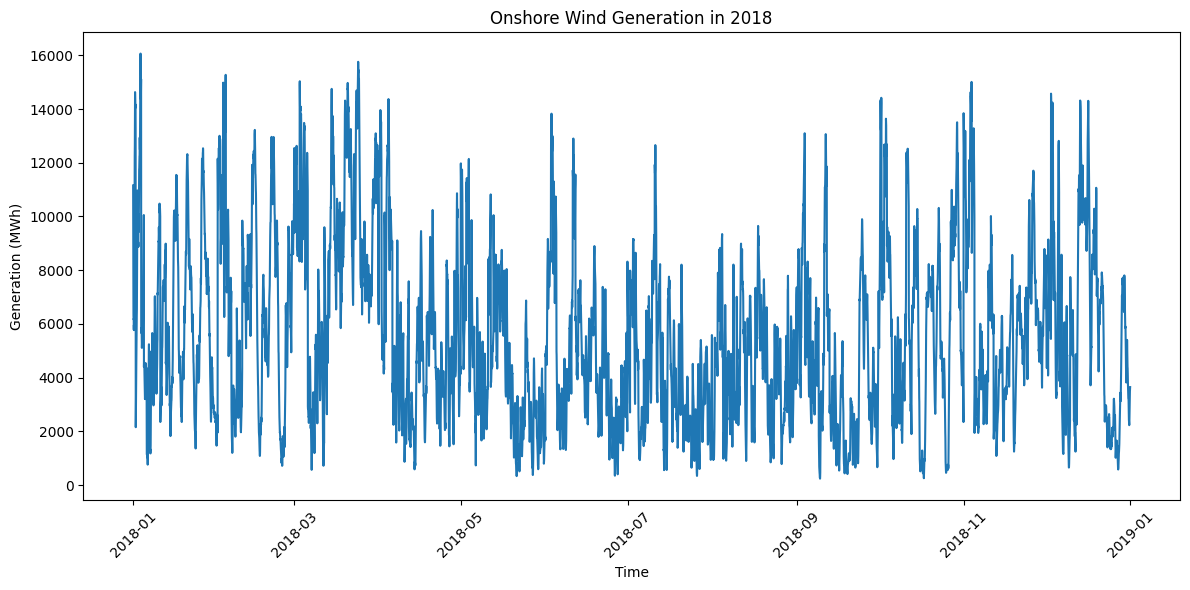

In [41]:
#plot onshore wind generation for 2018
plt.figure(figsize=(12, 6))
sns.lineplot(data=ow_generation_2018, x=ow_generation_2018.index, y='generation wind onshore')
plt.title('Onshore Wind Generation in 2018')
plt.xlabel('Time')
plt.ylabel('Generation (MWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

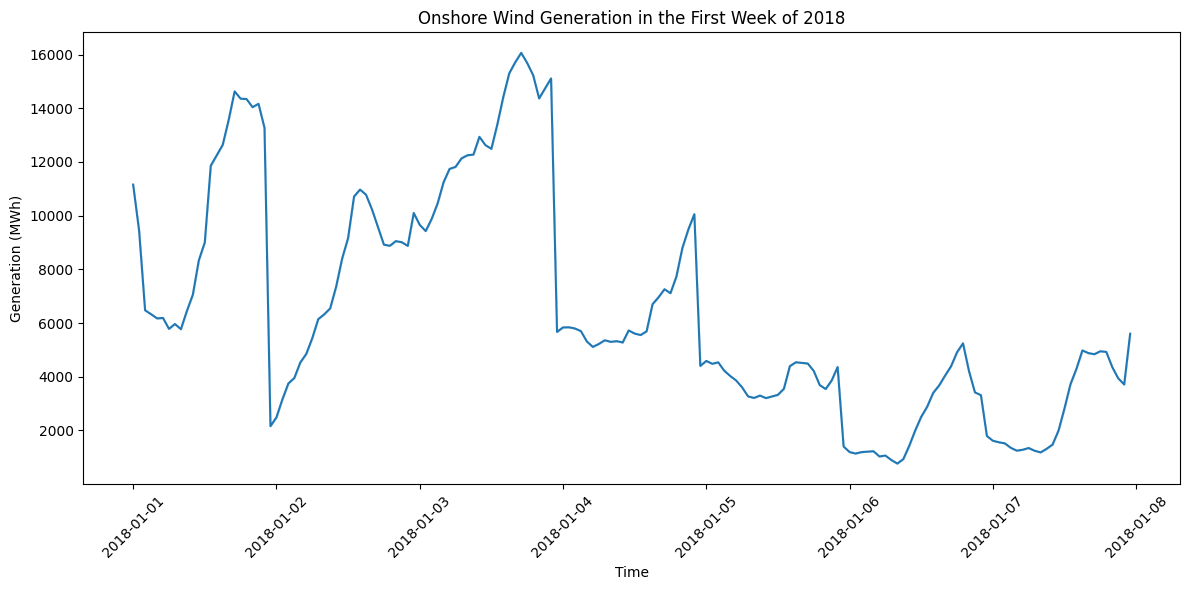

In [44]:
# Ensure the index is sorted
df_weather_2018 = df_weather_2018.sort_index()

# Merge weather data with onshore wind generation data
merged_data = df_weather_2018.merge(ow_generation_2018, left_index=True, right_index=True, how='inner')

# Look at one week of data
one_week_data = merged_data.loc['2018-01-01':'2018-01-07']

# Plot one week of generation data
plt.figure(figsize=(12, 6))
sns.lineplot(data=one_week_data, x=one_week_data.index, y='generation wind onshore')
plt.title('Onshore Wind Generation in the First Week of 2018')
plt.xlabel('Time')
plt.ylabel('Generation (MWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()